# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

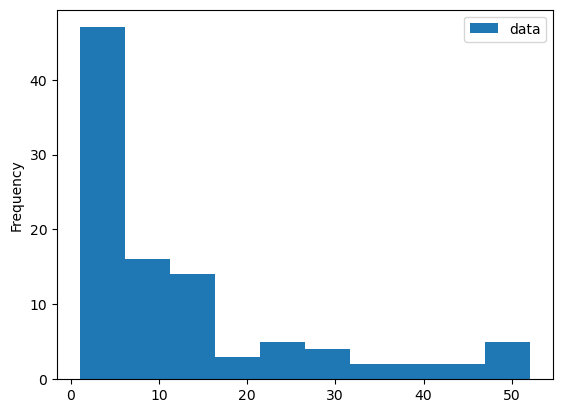

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

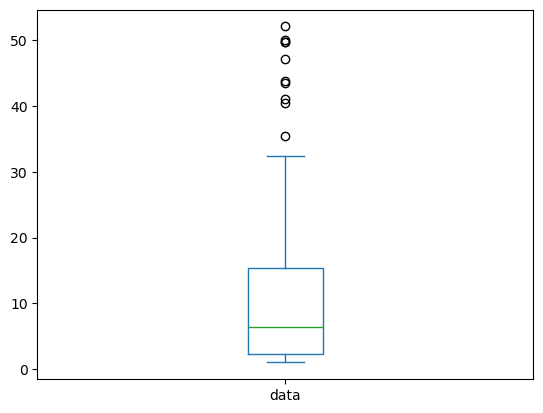

In [3]:
df.plot.box()

## Histogram vs Boxplot - Which is better?

**Histogram pros:** You can actually see the shape of the distribution and where most of the data clusters. Easy to understand at a glance. Good for seeing the full picture.

**Histogram cons:** Choosing bin sizes is kind of annoying and can make it look different. Doesn't clearly show outliers or quartiles.

**Boxplot pros:** Gives you the median, quartiles, and clearly shows outliers (those dots). Really compact and good for comparing groups. Perfect for spotting those expensive drugs.

**Boxplot cons:** You can't see the actual distribution shape or how many data points are in each section. Less intuitive if you're not used to reading them.

**My choice: Histogram** - I'd go with the histogram for this scenario because the admin needs to see the whole context of drug prices, not just summary stats. Most drugs are cheap with a few expensive ones, and the histogram shows that story way better.

**To make it better:** I'd add a vertical line at the 75th percentile to mark where the "expensive" drugs start, use better colors (like blue bars with black edges), and add clear axis labels like "Drug Price ($)" and "Number of Drugs". Maybe add a title that explains what we're seeing.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the credit card fraud dataset
# Source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
# 284,807 transactions from Sept 2013 by European cardholders
# V1-V28: PCA-transformed features (anonymized for confidentiality)
# Time: seconds elapsed since first transaction
# Amount: transaction amount
# Class: 0 = genuine, 1 = fraud
df = pd.read_csv("creditcard.csv")

print("Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Shape: (284807, 31)

First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Basic Info & Missing Values

In [5]:
print("Data types:")
print(df.dtypes.value_counts())
print("\nMissing values:", df.isnull().sum().sum())
print("\nBasic statistics:")
df.describe()

Data types:
float64    30
int64       1
Name: count, dtype: int64

Missing values: 0

Basic statistics:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Histograms - Time and Amount Features

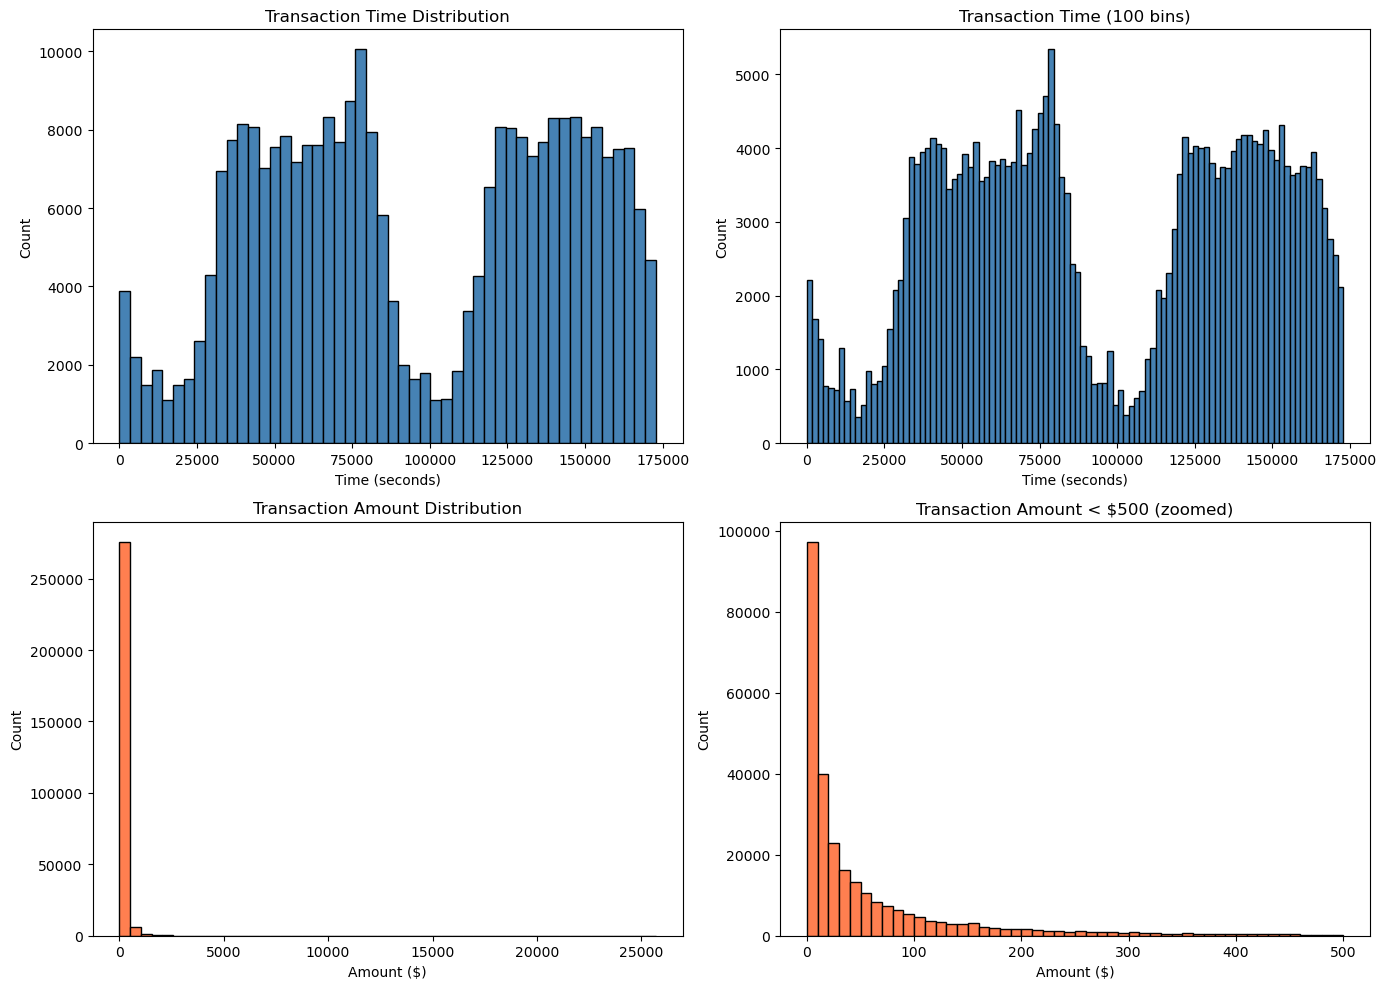

In [6]:
# Histograms for Time and Amount (the non-PCA features)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Time histogram
axes[0, 0].hist(df["Time"], bins=50, color="steelblue", edgecolor="black")
axes[0, 0].set_title("Transaction Time Distribution")
axes[0, 0].set_xlabel("Time (seconds)")
axes[0, 0].set_ylabel("Count")

# Time with different bin size to show effect
axes[0, 1].hist(df["Time"], bins=100, color="steelblue", edgecolor="black")
axes[0, 1].set_title("Transaction Time (100 bins)")
axes[0, 1].set_xlabel("Time (seconds)")
axes[0, 1].set_ylabel("Count")

# Amount histogram
axes[1, 0].hist(df["Amount"], bins=50, color="coral", edgecolor="black")
axes[1, 0].set_title("Transaction Amount Distribution")
axes[1, 0].set_xlabel("Amount ($)")
axes[1, 0].set_ylabel("Count")

# Amount histogram (zoomed in, under $500)
axes[1, 1].hist(df[df["Amount"] < 500]["Amount"], bins=50, color="coral", edgecolor="black")
axes[1, 1].set_title("Transaction Amount < $500 (zoomed)")
axes[1, 1].set_xlabel("Amount ($)")
axes[1, 1].set_ylabel("Count")

plt.tight_layout()
plt.show()

### KDE Plots and Violin Plots for Selected PCA Features

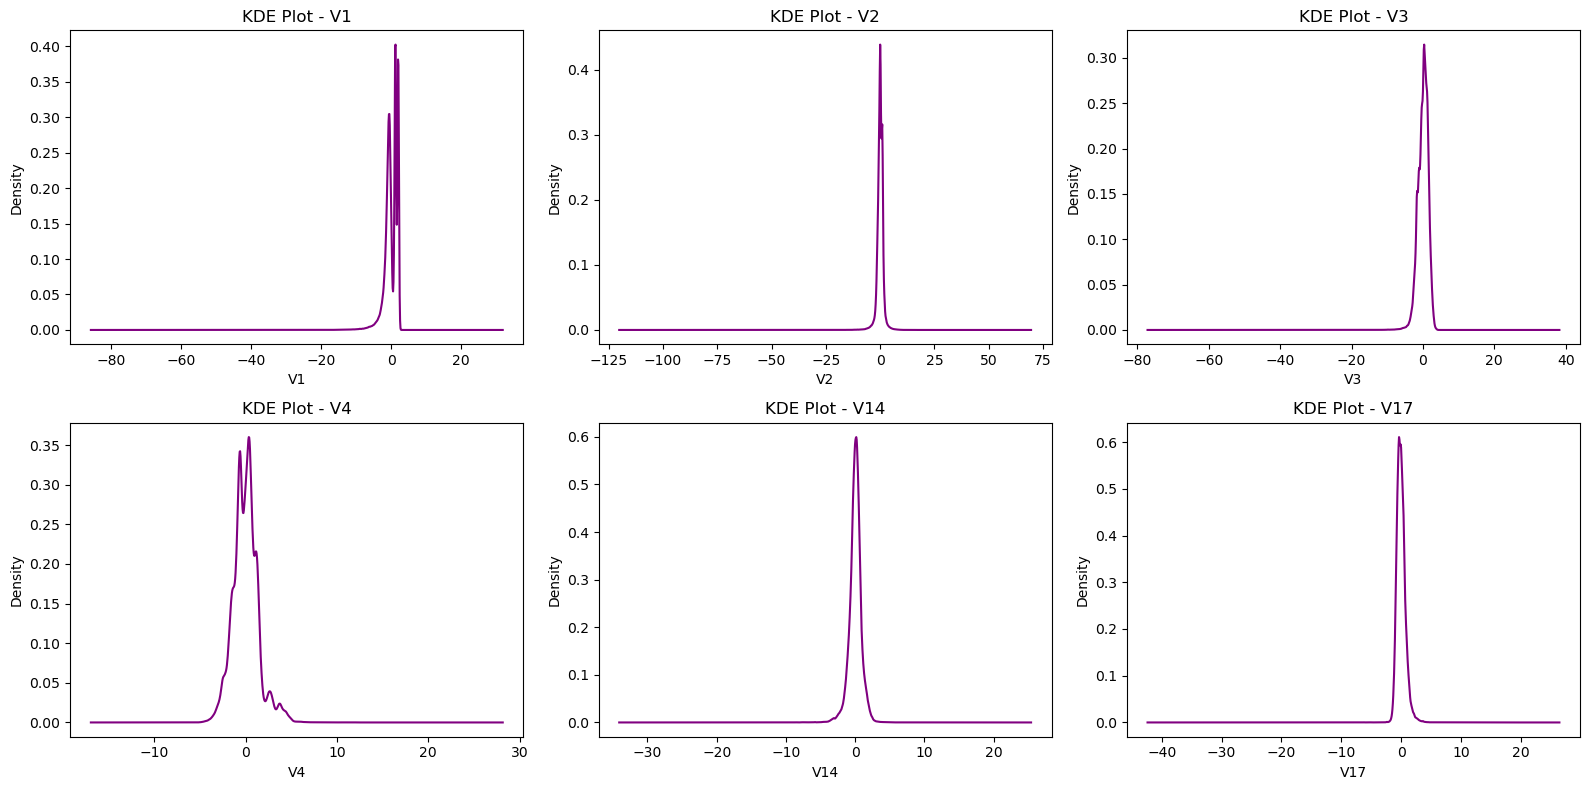

In [7]:
# KDE plots for a selection of PCA features
selected_features = ["V1", "V2", "V3", "V4", "V14", "V17"]

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
for i, feat in enumerate(selected_features):
    ax = axes[i // 3, i % 3]
    df[feat].plot.kde(ax=ax, color="purple")
    ax.set_title(f"KDE Plot - {feat}")
    ax.set_xlabel(feat)

plt.tight_layout()
plt.show()

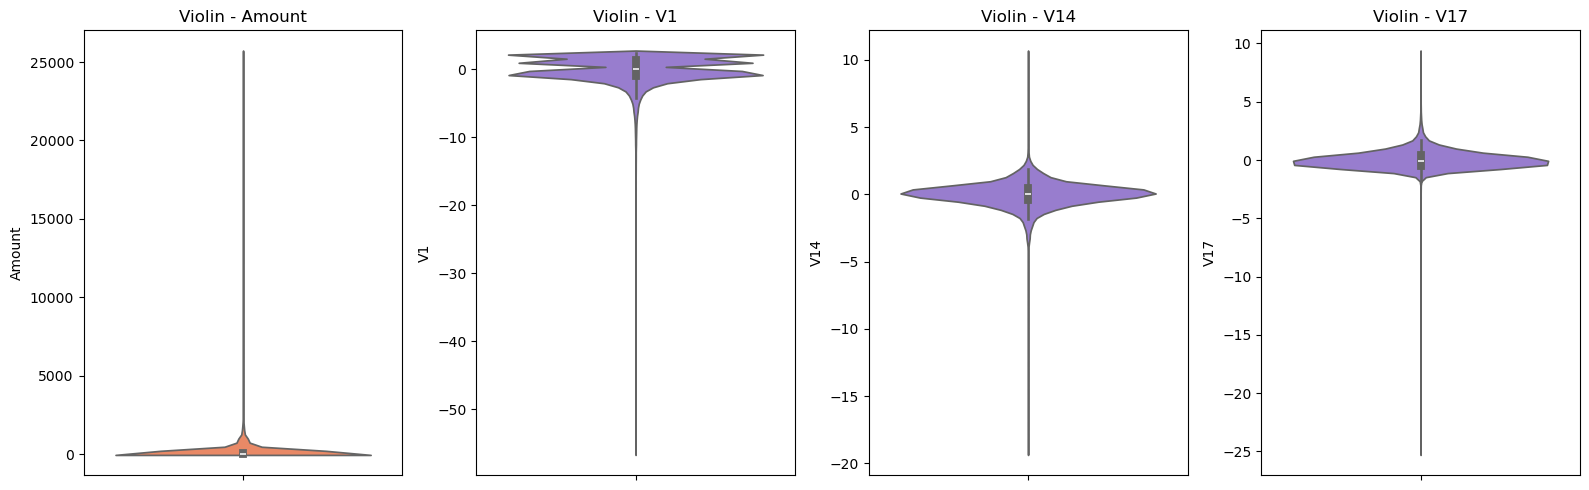

In [8]:
# Violin plots for Amount and selected PCA features
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

sns.violinplot(y=df["Amount"], ax=axes[0], color="coral")
axes[0].set_title("Violin - Amount")

for i, feat in enumerate(["V1", "V14", "V17"]):
    sns.violinplot(y=df[feat], ax=axes[i + 1], color="mediumpurple")
    axes[i + 1].set_title(f"Violin - {feat}")

plt.tight_layout()
plt.show()

### Grouped Histograms - Fraud vs Genuine Transactions

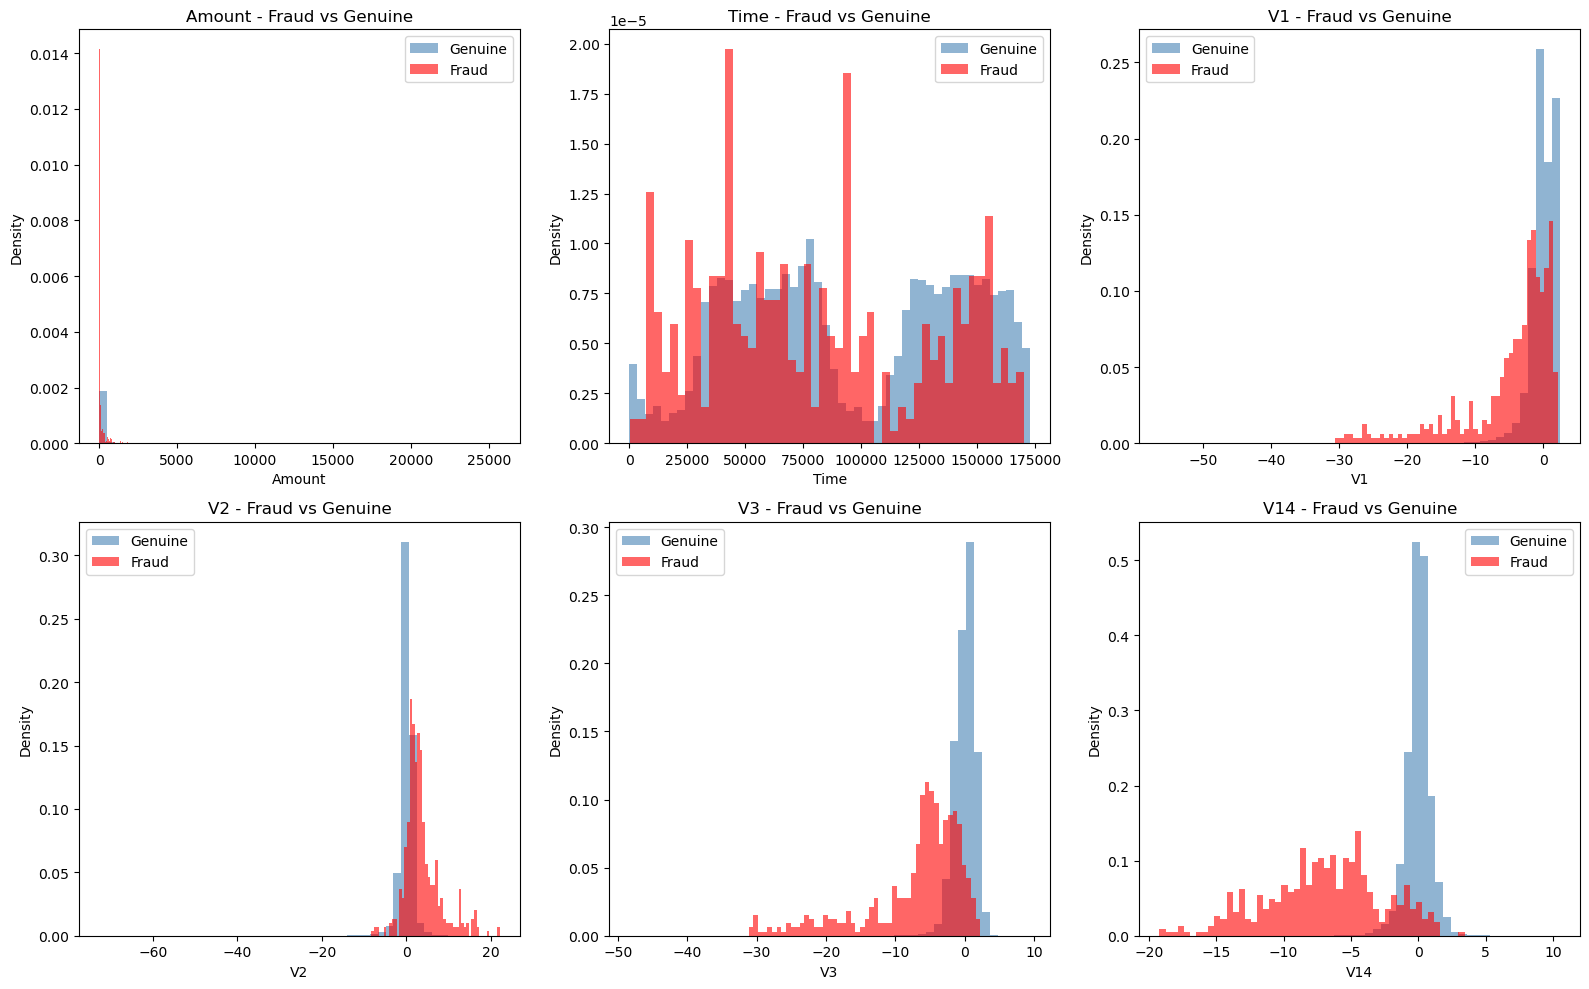

In [9]:
# Grouped histograms: compare fraud vs genuine for key features
fraud = df[df["Class"] == 1]
genuine = df[df["Class"] == 0]

features_to_compare = ["Amount", "Time", "V1", "V2", "V3", "V14"]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
for i, feat in enumerate(features_to_compare):
    ax = axes[i // 3, i % 3]
    ax.hist(genuine[feat], bins=50, alpha=0.6, label="Genuine", color="steelblue", density=True)
    ax.hist(fraud[feat], bins=50, alpha=0.6, label="Fraud", color="red", density=True)
    ax.set_title(f"{feat} - Fraud vs Genuine")
    ax.set_xlabel(feat)
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()

### Bar Plot - Class Distribution (Fraud vs Genuine)

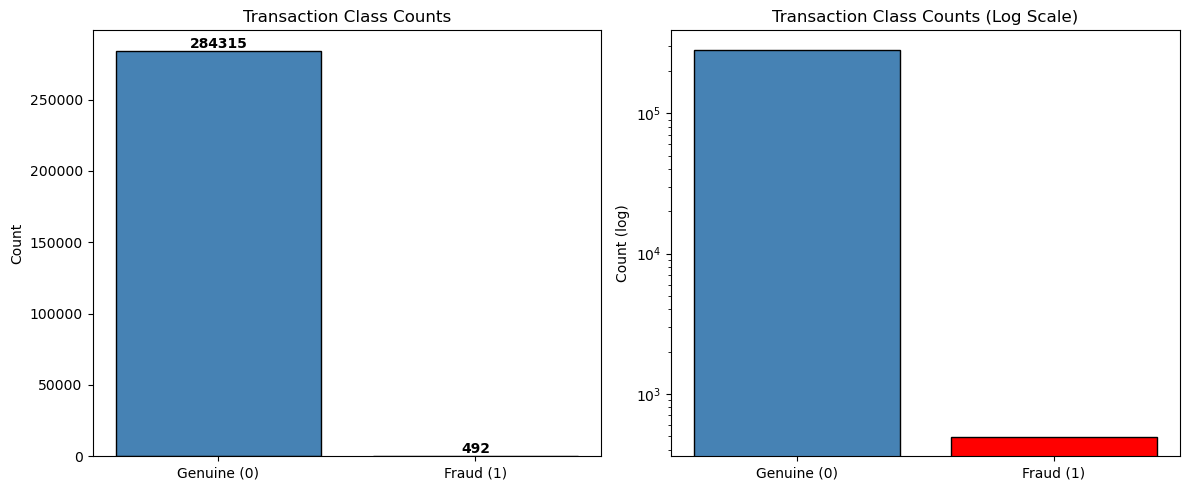

Genuine: 284315 (99.827%)
Fraud:   492 (0.173%)


In [10]:
# Bar plot for the Class categorical variable
class_counts = df["Class"].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Regular scale
axes[0].bar(["Genuine (0)", "Fraud (1)"], class_counts.values,
            color=["steelblue", "red"], edgecolor="black")
axes[0].set_title("Transaction Class Counts")
axes[0].set_ylabel("Count")
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 2000, str(v), ha="center", fontweight="bold")

# Log scale to see the fraud bar better
axes[1].bar(["Genuine (0)", "Fraud (1)"], class_counts.values,
            color=["steelblue", "red"], edgecolor="black")
axes[1].set_title("Transaction Class Counts (Log Scale)")
axes[1].set_ylabel("Count (log)")
axes[1].set_yscale("log")

plt.tight_layout()
plt.show()

print(f"Genuine: {class_counts[0]} ({class_counts[0]/len(df)*100:.3f}%)")
print(f"Fraud:   {class_counts[1]} ({class_counts[1]/len(df)*100:.3f}%)")

### Mean, Median, Mode & Boxplots

In [11]:
# Mean, Median, Mode for key features
key_features = ["Time", "Amount", "V1", "V2", "V3", "V14", "V17"]

stats_data = []
for feat in key_features:
    stats_data.append({
        "Feature": feat,
        "Mean": round(df[feat].mean(), 4),
        "Median": round(df[feat].median(), 4),
        "Mode": round(df[feat].mode()[0], 4),
        "Std Dev": round(df[feat].std(), 4),
        "Min": round(df[feat].min(), 4),
        "Max": round(df[feat].max(), 4)
    })

stats_df = pd.DataFrame(stats_data)
stats_df

,Feature,Mean,Median,Mode,Std Dev,Min,Max
0,Time,94813.8596,84692.0000,163152.0000,47488.1460,0.0000,172792.0000
1,Amount,88.3496,22.0000,1.0000,250.1201,0.0000,25691.1600
2,V1,0.0000,0.0181,1.2457,1.9587,-56.4075,2.4549
3,V2,0.0000,0.0655,-0.3267,1.6513,-72.7157,22.0577
4,V3,-0.0000,0.1798,-2.7520,1.5163,-48.3256,9.3826
5,V14,0.0000,0.0506,0.4070,0.9586,-19.2143,10.5268
6,V17,-0.0000,-0.0657,-0.6020,0.8493,-25.1628,9.2535


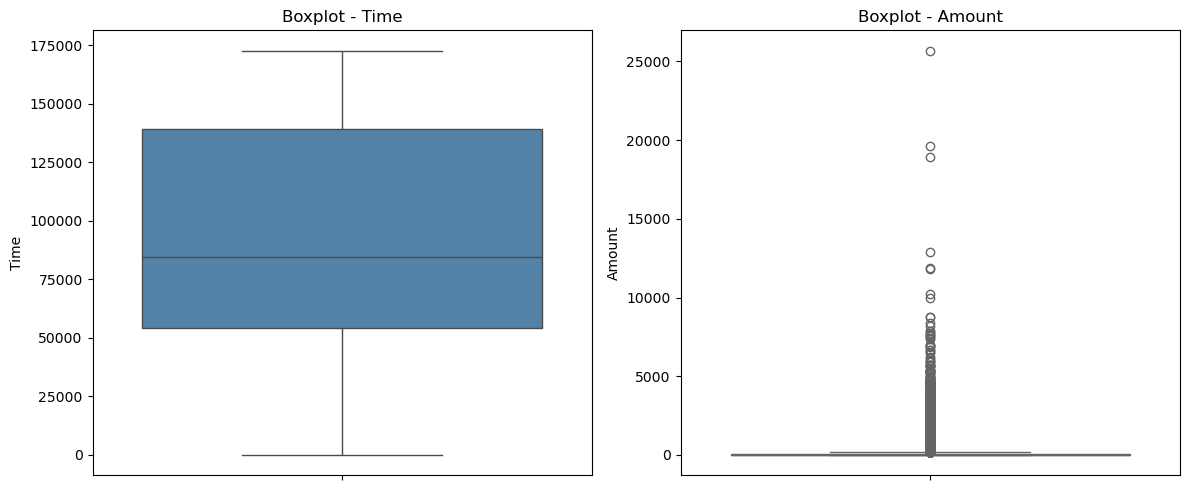

In [12]:
# Boxplots for Time and Amount to visualize outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df["Time"], ax=axes[0], color="steelblue")
axes[0].set_title("Boxplot - Time")

sns.boxplot(y=df["Amount"], ax=axes[1], color="coral")
axes[1].set_title("Boxplot - Amount")

plt.tight_layout()
plt.show()

### Conclusions

**Are the data what we expect?**
- Yes. The dataset contains 284,807 credit card transactions with 492 frauds (0.172%), which is realistic for real-world fraud detection - fraud is extremely rare compared to legitimate transactions.
- No missing values, and all features are numerical, which makes the data clean and ready to use.

**Distribution shapes:**
- **Time:** Appears roughly bimodal, with two peaks likely corresponding to day and night transaction patterns over the 2-day period. This makes sense since people transact more during the day.
- **Amount:** Extremely right-skewed. The vast majority of transactions are small amounts, with a long tail of larger transactions. This is typical of financial data.
- **V1-V28 (PCA features):** Most are approximately normally distributed (centered around 0), which is expected since PCA standardizes the data. Some features show heavier tails or slight skewness.

**Outliers:**
- **Amount** has significant outliers, with some transactions reaching over $25,000 while the median is much lower. The boxplot clearly shows many upper outliers.
- Several PCA features (V1, V2, V3, etc.) have outliers, some of which correspond to fraudulent transactions.
- **Time** does not have traditional outliers since it is uniformly spread over the 2-day window.

**How does the distribution change across groups (fraud vs genuine)?**
- In the grouped histograms, fraudulent transactions show noticeably different distributions for features like V1, V2, V3, and V14 compared to genuine ones. This means these features carry discriminative information for detecting fraud.
- Fraud amounts tend to be smaller on average than the most extreme legitimate transactions.

**Effect of bin sizes:**
- Increasing from 50 to 100 bins on the Time histogram reveals finer-grained patterns (the bimodal dips become more visible). Fewer bins would smooth out these patterns.
- For Amount, smaller bins help reveal the extreme concentration of values near zero.

**Is the data usable?**
- Yes, the data is highly usable. However, the extreme class imbalance (only 0.172% fraud) means that any modeling would need to account for this through techniques like oversampling, undersampling, or using appropriate evaluation metrics like AUPRC (Area Under Precision-Recall Curve) rather than simple accuracy.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

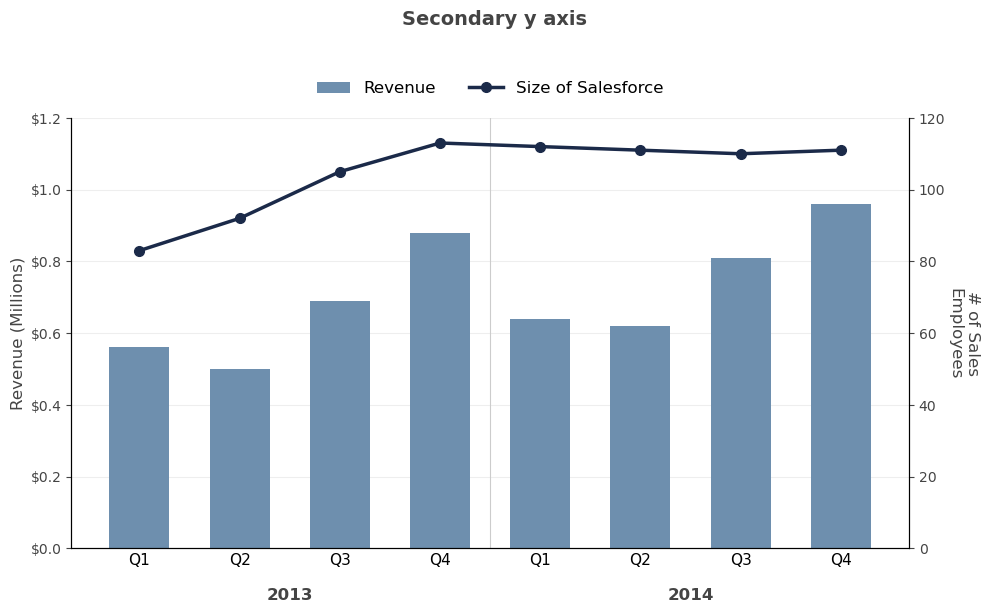

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

# Data from the chart (approximate values)
quarters = ["Q1", "Q2", "Q3", "Q4", "Q1", "Q2", "Q3", "Q4"]
years = ["2013", "2013", "2013", "2013", "2014", "2014", "2014", "2014"]
revenue = [0.56, 0.50, 0.69, 0.88, 0.64, 0.62, 0.81, 0.96]
salesforce = [83, 92, 105, 113, 112, 111, 110, 111]

x = np.arange(len(quarters))

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for Revenue
bar_color = "#6E8FAE"
bars = ax1.bar(x, revenue, width=0.6, color=bar_color, zorder=2)

# Left y-axis: Revenue
ax1.set_ylabel("Revenue (Millions)", fontsize=12, color="#444444")
ax1.set_ylim(0, 1.2)
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda v, _: f"${v:.1f}"))
ax1.tick_params(axis="y", colors="#444444")

# X-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(quarters, fontsize=11)
ax1.tick_params(axis="x", length=0)

# Add year labels below quarters
# Add separator and year groupings
ax1.text(1.5, -0.12, "2013", ha="center", fontsize=12, fontweight="bold",
         transform=ax1.get_xaxis_transform(), color="#444444")
ax1.text(5.5, -0.12, "2014", ha="center", fontsize=12, fontweight="bold",
         transform=ax1.get_xaxis_transform(), color="#444444")

# Add a vertical separator between years
ax1.axvline(x=3.5, color="#cccccc", linewidth=0.8, linestyle="-", zorder=1)

# Right y-axis: Salesforce size
ax2 = ax1.twinx()
line_color = "#1B2A49"
ax2.plot(x, salesforce, color=line_color, linewidth=2.5, marker="o",
         markersize=7, markerfacecolor=line_color, zorder=3)
ax2.set_ylabel("# of Sales\nEmployees", fontsize=12, color="#444444", rotation=270, labelpad=25)
ax2.set_ylim(0, 120)
ax2.tick_params(axis="y", colors="#444444")

# Remove top and right spines for cleaner look, keep grid subtle
ax1.spines["top"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax1.set_axisbelow(True)
ax1.yaxis.grid(True, color="#eeeeee", linewidth=0.8)

# Legend
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elements = [
    Patch(facecolor=bar_color, label="Revenue"),
    Line2D([0], [0], color=line_color, linewidth=2.5, marker="o",
           markersize=7, markerfacecolor=line_color, label="Size of Salesforce")
]
ax1.legend(handles=legend_elements, loc="upper center", bbox_to_anchor=(0.5, 1.12),
           ncol=2, frameon=False, fontsize=12, handlelength=2)

# Title
fig.suptitle("Secondary y axis", fontsize=14, fontweight="bold", y=1.02, color="#444444")

plt.tight_layout()
plt.show()